In [39]:
import pandas as pd
from datetime import datetime, timedelta

weather_df = pd.read_csv('data\Weather.csv') # dacon에서 날씨 데이터 가져오기
weather_df2 = pd.read_csv('test.csv') # 6월 이후 날씨 데이터

confirmed_df = pd.read_csv('data\TimeProvince.csv') # 날짜별 지역별 확진자 데이터

In [40]:
weather_df = weather_df.loc[:, ['date', 'province', 'avg_relative_humidity']] # 날짜, 지역, 평균상대습도만
weather_2020 = weather_df['date'].str.contains("2020") # 데이터가 2016년부터여서 2020년꺼만 가져오기
weather_df = weather_df[weather_2020]

weather_df2 = weather_df2.loc[:, ['date', 'province', 'avg_relative_humidity']]

In [41]:
confirmed_df = confirmed_df.loc[:, ['date', 'province', 'confirmed']] # 날짜, 지역, 확진자 수

In [42]:
# 서울 확진자 수
seoul_confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Seoul'] # 서울 지역 확진자
seoul_confirmed = seoul_confirmed.reset_index(drop=True) # 서울인 것만 빼온거여서 인덱스 새로 부여 / drop=True 는 원래 인덱스 버리기

for i in range(len(seoul_confirmed)-1, 1, -1):
    seoul_confirmed['confirmed'][i] = seoul_confirmed['confirmed'][i] - seoul_confirmed['confirmed'][i-1] # 누적 확진자 수여서 오늘에서 어제꺼 빼면 오늘 확진자 수
    
seoul_confirmed['date'] = pd.to_datetime(seoul_confirmed['date']) # 날짜 데이터의 타입을 날짜로 바꿔줌 (원래 object)

C:\Users\kim4-\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
# 서울 습도
seoul_humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Seoul']
seoul_humidity = seoul_humidity.reset_index(drop=True)

seoul_humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Seoul']
seoul_humidity2 = seoul_humidity2.reset_index(drop=True)

seoul_humidity['date'] = pd.to_datetime(seoul_humidity['date'])
seoul_humidity2['date'] = pd.to_datetime(seoul_humidity2['date'])

seoul_humidity['date'] = seoul_humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
seoul_humidity2['date'] = seoul_humidity2['date'] + pd.DateOffset(days = 5)

seoul_humidity = pd.concat([seoul_humidity, seoul_humidity2]) # 습도 데이터 두개 이어 붙이기
x_date = seoul_humidity[seoul_humidity['date'] < '2020-01-20'].index # 코로나 확진자가 1월 20일 부터여서 1월 20일 미만인 데이터 뽑기
seoul_humidity = seoul_humidity.drop(x_date) # 위에서 뽑은 인덱스 버리기

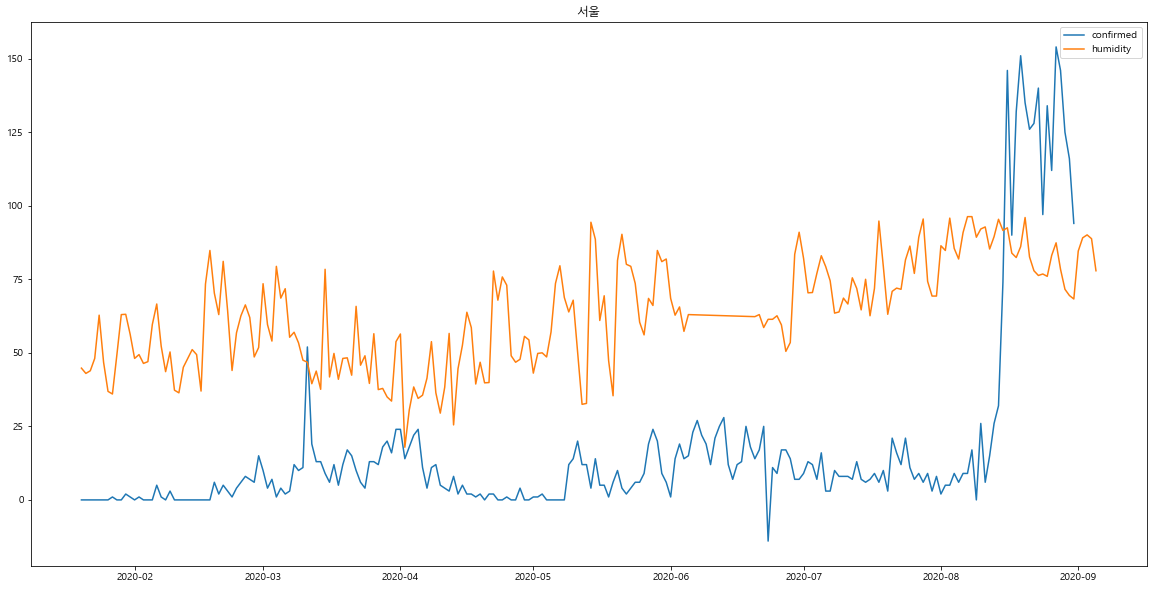

In [44]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20, 10))
plt.plot(seoul_confirmed['date'], seoul_confirmed['confirmed'], label='confirmed')
plt.plot(seoul_humidity['date'], seoul_humidity['avg_relative_humidity'], label = 'humidity')
plt.title("서울")
plt.legend()
plt.show()